In [183]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

### Load the dataset

In [184]:
# read the dataset
df = pd.read_csv('../data/raw_csv.csv')
df = df.sample(frac=0.2).reset_index(drop=True)
df.head()

,id,storeId,storeName,title,rating,lunchTime,category,postCategory,sold,price,discount,shippingCost,imageUrl,storeUrl,category_name,category_id,type
0,1005003736249998,1381900,JAYCEE HAIR Official Store,Indian Water Wave Bundles With Closure Wet and...,4.8,2021-12-26 00:00:00,NaN,200337146,208 sold,150.05,54,0.00,//ae01.alicdn.com/kf/A8a0628c217984ff0b0e2e182...,//www.aliexpress.com/store/1381900,human-hair-weaves,200218141,natural
1,1005003700924787,4990411,Ali 3C Accessories Store,Iron Wall-mounted Grid Hanging Rack Newspaper ...,5.0,2021-12-17 00:00:00,NaN,201331204,3 sold,35.79,11,40.42,//ae01.alicdn.com/kf/Sb8c7c3e8d2dd45acb9368b39...,//www.aliexpress.com/store/4990411,filing-products,100003804,natural
2,1005004917512458,1102072091,Serendipity Meet You Store,Pupper Nelson Photo Meme Face Sock Socks Men W...,0.0,2022-11-03 00:00:00,NaN,200000384,0,8.69,91,20.04,//ae01.alicdn.com/kf/S993fd6faa02d40d88fbcdbb7...,//www.aliexpress.com/store/1102072091,men-socks,200003491,natural
3,1005004347924865,2149017,China 3C Tech Store,PC Camera Webcam Built In Noise Cancelling Mic...,0.0,2022-05-30 00:00:00,NaN,200304148,0,71.42,41,7.41,//ae01.alicdn.com/kf/Sd36f14be26124c628a37fdc4...,//www.aliexpress.com/store/2149017,robot,200217794,natural
4,1005005043246987,912512351,LLLU Decor store Store,New Fashion Metal Zipper Sewing Diy Craft Zipp...,0.0,2022-12-08 00:00:00,NaN,32806,0,2.82,40,12.62,//ae01.alicdn.com/kf/Sa3dc798e9cbd48e792f6ce23...,//www.aliexpress.com/store/912512351,arts-crafts-sewing,200154001,natural


## Clean data

In [185]:
# get a count of nan values
nan_counts = df.isna().sum()
print(nan_counts)

id                    0
storeId               0
storeName             0
title                 0
rating                0
lunchTime             0
category         172854
postCategory          0
sold                  0
price                 0
discount              0
shippingCost      13043
imageUrl              0
storeUrl              0
category_name         0
category_id           0
type                  0
dtype: int64


#### Remove unnecessary columns
If we look at the table above we will see that we need to remove 'category' feature because it has only NaN values. We also need to remove Url-related features because they give no useful data for us. The id is a unique number for each instance of the table, so we are going to remove it as well

In [186]:
df = df.drop(columns=['category','imageUrl','storeUrl', 'id'])
df.head()

,storeId,storeName,title,rating,lunchTime,postCategory,sold,price,discount,shippingCost,category_name,category_id,type
0,1381900,JAYCEE HAIR Official Store,Indian Water Wave Bundles With Closure Wet and...,4.8,2021-12-26 00:00:00,200337146,208 sold,150.05,54,0.00,human-hair-weaves,200218141,natural
1,4990411,Ali 3C Accessories Store,Iron Wall-mounted Grid Hanging Rack Newspaper ...,5.0,2021-12-17 00:00:00,201331204,3 sold,35.79,11,40.42,filing-products,100003804,natural
2,1102072091,Serendipity Meet You Store,Pupper Nelson Photo Meme Face Sock Socks Men W...,0.0,2022-11-03 00:00:00,200000384,0,8.69,91,20.04,men-socks,200003491,natural
3,2149017,China 3C Tech Store,PC Camera Webcam Built In Noise Cancelling Mic...,0.0,2022-05-30 00:00:00,200304148,0,71.42,41,7.41,robot,200217794,natural
4,912512351,LLLU Decor store Store,New Fashion Metal Zipper Sewing Diy Craft Zipp...,0.0,2022-12-08 00:00:00,32806,0,2.82,40,12.62,arts-crafts-sewing,200154001,natural


#### Clean the "sold" column by converting values into integers 

In [187]:
# Sold column looks like sold count + string "sold". We want to leave only the number
def clean_sold(sold_data: str) -> int:
    try:
        sold_count, _ = str.split(sold_data)
    except ValueError:
        sold_count = sold_data
    return int(sold_count)

df['sold'] = df['sold'].apply(clean_sold)
df.head()

,storeId,storeName,title,rating,lunchTime,postCategory,sold,price,discount,shippingCost,category_name,category_id,type
0,1381900,JAYCEE HAIR Official Store,Indian Water Wave Bundles With Closure Wet and...,4.8,2021-12-26 00:00:00,200337146,208,150.05,54,0.00,human-hair-weaves,200218141,natural
1,4990411,Ali 3C Accessories Store,Iron Wall-mounted Grid Hanging Rack Newspaper ...,5.0,2021-12-17 00:00:00,201331204,3,35.79,11,40.42,filing-products,100003804,natural
2,1102072091,Serendipity Meet You Store,Pupper Nelson Photo Meme Face Sock Socks Men W...,0.0,2022-11-03 00:00:00,200000384,0,8.69,91,20.04,men-socks,200003491,natural
3,2149017,China 3C Tech Store,PC Camera Webcam Built In Noise Cancelling Mic...,0.0,2022-05-30 00:00:00,200304148,0,71.42,41,7.41,robot,200217794,natural
4,912512351,LLLU Decor store Store,New Fashion Metal Zipper Sewing Diy Craft Zipp...,0.0,2022-12-08 00:00:00,32806,0,2.82,40,12.62,arts-crafts-sewing,200154001,natural


In [188]:
# Translate the timestamp to year, month, and day
df['year'] = df['lunchTime'].apply(lambda date: datetime.strptime(date.split()[0], '%Y-%m-%d').year)
df['month'] = df['lunchTime'].apply(lambda date: datetime.strptime(date.split()[0], '%Y-%m-%d').month)
df['day'] = df['lunchTime'].apply(lambda date: datetime.strptime(date.split()[0], '%Y-%m-%d').day)

# Drop the launch time column
df = df.drop(columns=['lunchTime'])

df.head()

,storeId,storeName,title,rating,postCategory,sold,price,discount,shippingCost,category_name,category_id,type,year,month,day
0,1381900,JAYCEE HAIR Official Store,Indian Water Wave Bundles With Closure Wet and...,4.8,200337146,208,150.05,54,0.00,human-hair-weaves,200218141,natural,2021,12,26
1,4990411,Ali 3C Accessories Store,Iron Wall-mounted Grid Hanging Rack Newspaper ...,5.0,201331204,3,35.79,11,40.42,filing-products,100003804,natural,2021,12,17
2,1102072091,Serendipity Meet You Store,Pupper Nelson Photo Meme Face Sock Socks Men W...,0.0,200000384,0,8.69,91,20.04,men-socks,200003491,natural,2022,11,3
3,2149017,China 3C Tech Store,PC Camera Webcam Built In Noise Cancelling Mic...,0.0,200304148,0,71.42,41,7.41,robot,200217794,natural,2022,5,30
4,912512351,LLLU Decor store Store,New Fashion Metal Zipper Sewing Diy Craft Zipp...,0.0,32806,0,2.82,40,12.62,arts-crafts-sewing,200154001,natural,2022,12,8


# TODO
3) rating value counts
3) launch time remove time stamp
5) fulfil shipping cost with mean
6) remove category_id because it is related to category name
7) store name???


In [189]:
# TODO
df = df[(df['sold'] > 20) & (df['rating'] > 0)]
df = df[df['storeName'].map(df['storeName'].value_counts()) > 5]
df.shape

(6411, 15)

## Data description & exploration

In [190]:
df.describe()

,storeId,rating,postCategory,sold,price,discount,shippingCost,category_id,year,month,day
count,6.411000e+03,6411.000000,6.411000e+03,6411.000000,6411.000000,6411.000000,5759.000000,6.411000e+03,6411.000000,6411.000000,6411.000000
mean,3.452336e+08,4.789549,1.059916e+08,642.153486,55.827191,37.230385,12.069609,1.346494e+08,2021.323818,6.985650,16.413976
std,4.613763e+08,0.308021,9.152658e+07,3331.714076,228.662873,20.588384,31.868624,8.477094e+07,1.112947,3.035481,8.728772
min,1.886600e+04,1.000000,3.510000e+02,21.000000,0.040000,0.000000,0.000000,5.000000e+00,2013.000000,1.000000,1.000000
25%,3.113029e+06,4.700000,3.007100e+05,41.000000,7.140000,24.000000,0.000000,7.080300e+07,2021.000000,5.000000,9.000000
50%,5.261042e+06,4.900000,1.000055e+08,90.000000,15.520000,38.000000,10.150000,2.000014e+08,2022.000000,7.000000,17.000000
75%,9.117469e+08,5.000000,2.000018e+08,271.000000,33.745000,50.000000,13.605000,2.001880e+08,2022.000000,9.000000,24.000000
max,1.102471e+09,5.000000,2.015334e+08,94665.000000,6671.550000,96.000000,675.960000,2.060863e+08,2022.000000,12.000000,31.000000


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6411 entries, 25 to 172817
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   storeId        6411 non-null   int64  
 1   storeName      6411 non-null   object 
 2   title          6411 non-null   object 
 3   rating         6411 non-null   float64
 4   postCategory   6411 non-null   int64  
 5   sold           6411 non-null   int64  
 6   price          6411 non-null   float64
 7   discount       6411 non-null   int64  
 8   shippingCost   5759 non-null   float64
 9   category_name  6411 non-null   object 
 10  category_id    6411 non-null   int64  
 11  type           6411 non-null   object 
 12  year           6411 non-null   int64  
 13  month          6411 non-null   int64  
 14  day            6411 non-null   int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 801.4+ KB


In [192]:
df.nunique()

storeId           677
storeName         675
title            5491
rating             27
postCategory      707
sold             1234
price            2451
discount           97
shippingCost      770
category_name     270
category_id       270
type                2
year               10
month              12
day                31
dtype: int64

#### Categories of the features with description
- Text:
    - storeName: name of the store
    - title: description of the product
- Numerical:
    - rating: rating of the product from 0 to 5
    - sold: number of times the product was sold
    - price: price after applying the discount in SAR (1SAR ~= 0.27USD)
    - discount: discount percentage of the product Price in between 0-100
    - shippingCost: Shipping Cost to Saudi Arabia in SAR
- Categorical
    - postCategory: probably, related to delivery
    - category_name: category the product is in
    - category_id: id of the category
    - type: either ad (Advertised) or natural (not Advertised)
- Time
    - year
    - month
    - day
    

#### Data distribution (Bivariate analysis)

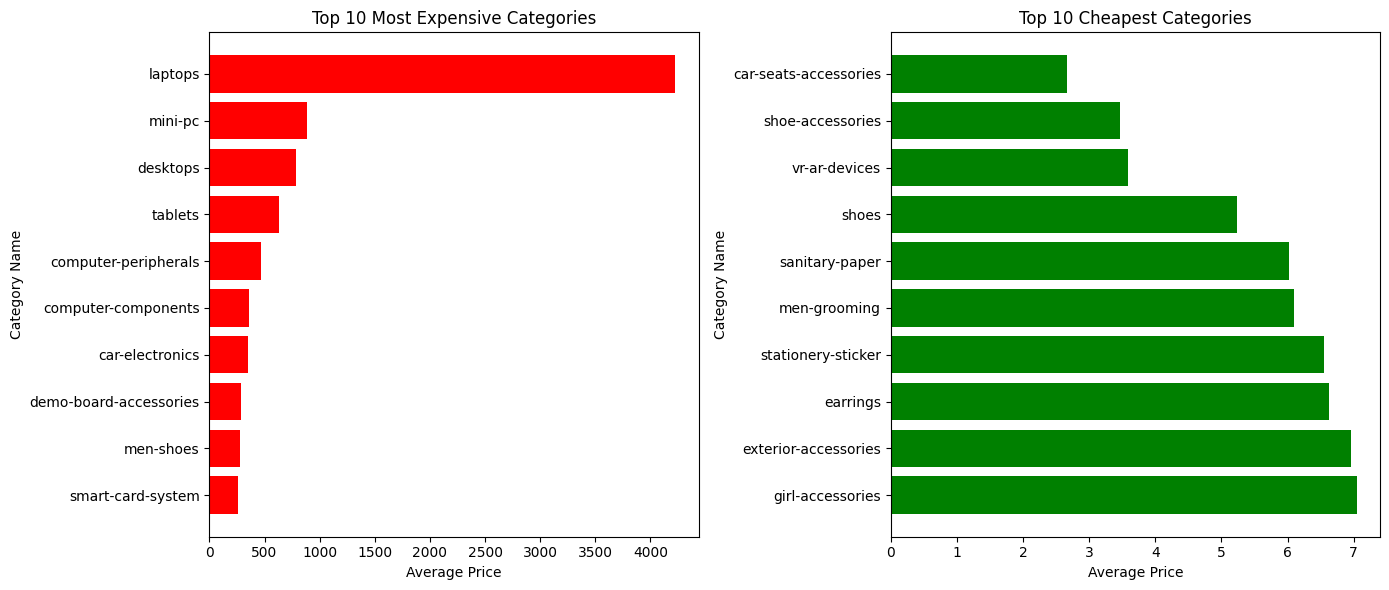

In [193]:
average_price = df.groupby('category_name')['price'].mean().reset_index()

most_expensive = average_price.sort_values(by='price', ascending=False).head(10)

cheapest = average_price.sort_values(by='price', ascending=True).head(10)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.barh(most_expensive['category_name'], most_expensive['price'], color='red')
plt.xlabel('Average Price')
plt.ylabel('Category Name')
plt.title('Top 10 Most Expensive Categories')
plt.gca().invert_yaxis()  

plt.subplot(1, 2, 2)
plt.barh(cheapest['category_name'], cheapest['price'], color='green')
plt.xlabel('Average Price')
plt.ylabel('Category Name')
plt.title('Top 10 Cheapest Categories')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

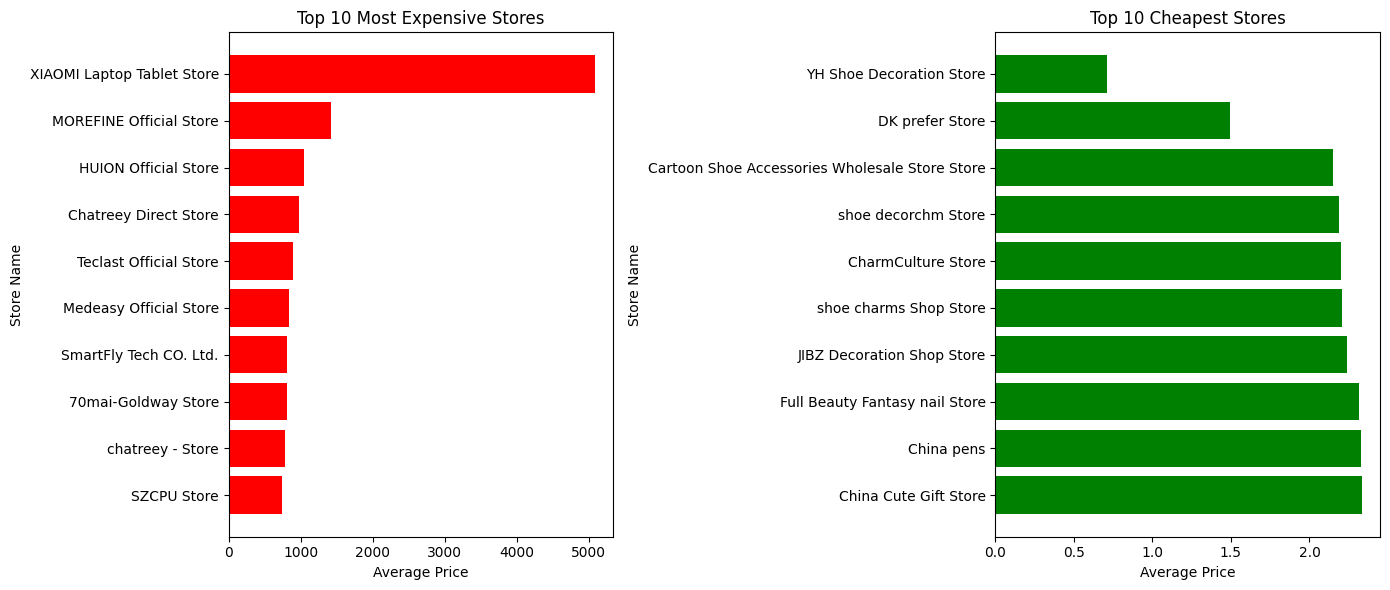

In [194]:
average_price = df.groupby('storeName')['price'].mean().reset_index()

most_expensive = average_price.sort_values(by='price', ascending=False).head(10)

cheapest = average_price.sort_values(by='price', ascending=True).head(10)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.barh(most_expensive['storeName'], most_expensive['price'], color='red')
plt.xlabel('Average Price')
plt.ylabel('Store Name')
plt.title('Top 10 Most Expensive Stores')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(cheapest['storeName'], cheapest['price'], color='green')
plt.xlabel('Average Price')
plt.ylabel('Store Name')
plt.title('Top 10 Cheapest Stores')
plt.gca().invert_yaxis()  

plt.tight_layout()
plt.show()

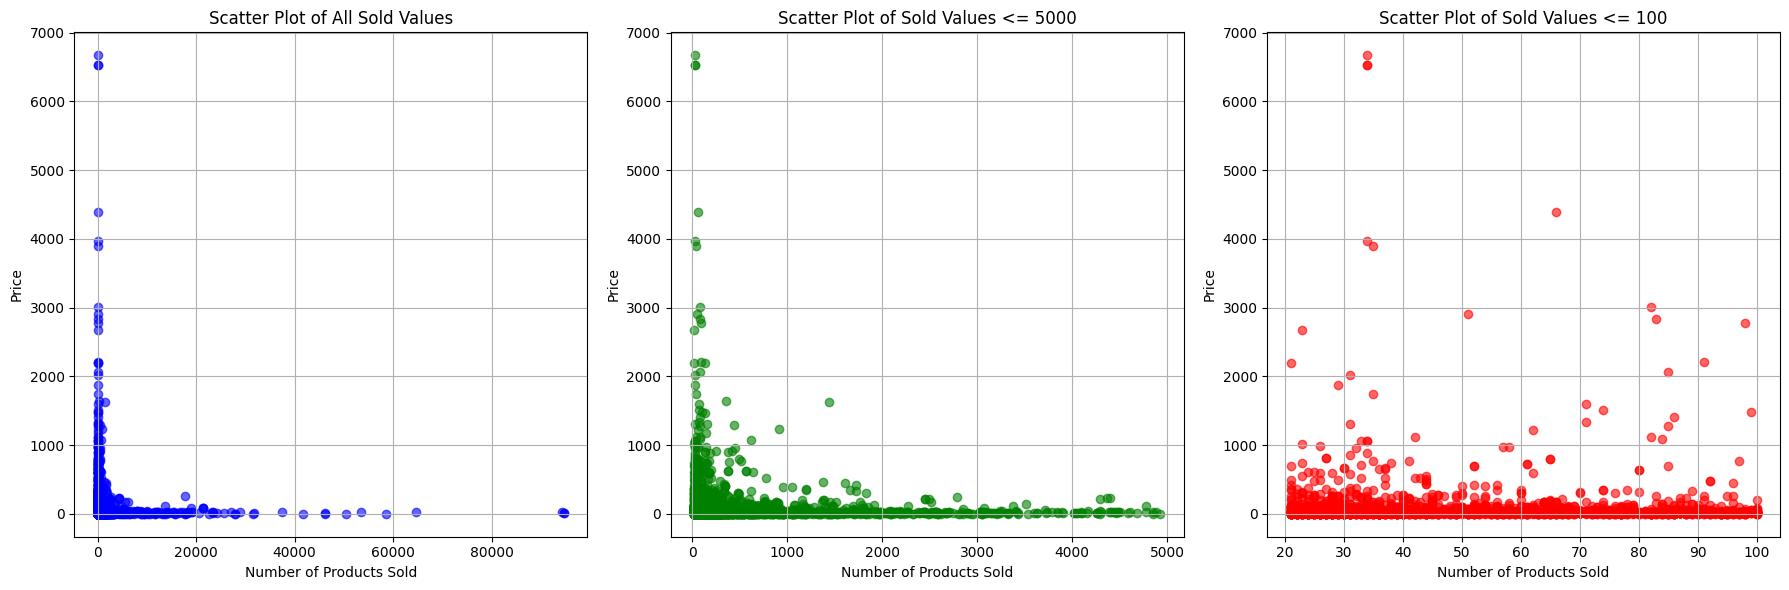

In [195]:
df_wo0 = df[df['sold'] != 0]

df_all = df_wo0
df_max_5000 = df_wo0[df_wo0['sold'] <= 5000]
df_max_100 = df_wo0[df_wo0['sold'] <= 100]
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(df_all['sold'], df_all['price'], color='blue', alpha=0.6)
plt.xlabel('Number of Products Sold')
plt.ylabel('Price')
plt.title('Scatter Plot of All Sold Values')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(df_max_5000['sold'], df_max_5000['price'], color='green', alpha=0.6)
plt.xlabel('Number of Products Sold')
plt.ylabel('Price')
plt.title('Scatter Plot of Sold Values <= 5000')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(df_max_100['sold'], df_max_100['price'], color='red', alpha=0.6)
plt.xlabel('Number of Products Sold')
plt.ylabel('Price')
plt.title('Scatter Plot of Sold Values <= 100')
plt.grid(True)

plt.tight_layout()
plt.show()

In [196]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Price')

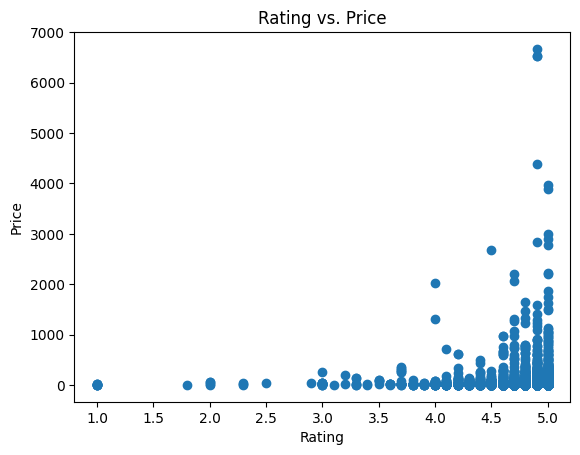

In [197]:
plt.scatter(df['rating'], df['price'])
plt.title("Rating vs. Price")
plt.xlabel("Rating")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

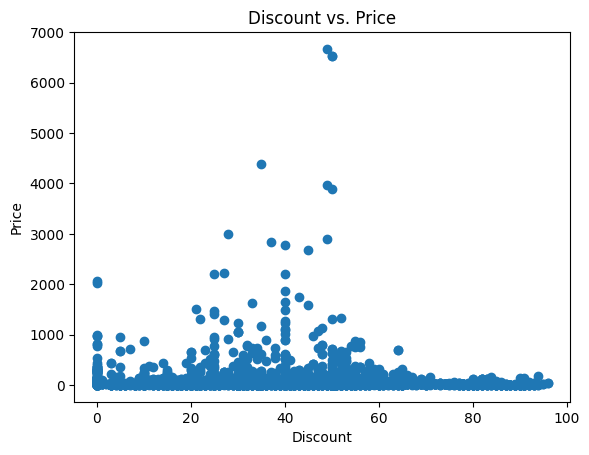

In [198]:
plt.scatter(df['discount'], df['price'])
plt.title("Discount vs. Price")
plt.xlabel("Discount")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

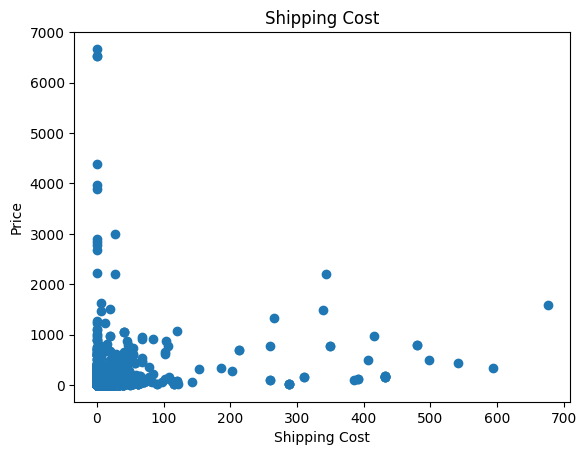

In [199]:
plt.scatter(df['shippingCost'], df['price'])
plt.title("Shipping Cost")
plt.xlabel("Shipping Cost")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

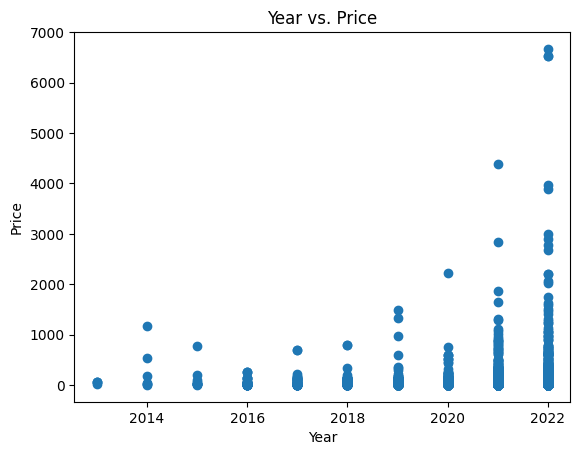

In [200]:
plt.scatter(df['year'], df['price'])
plt.title("Year vs. Price")
plt.xlabel("Year")
plt.ylabel("Price")

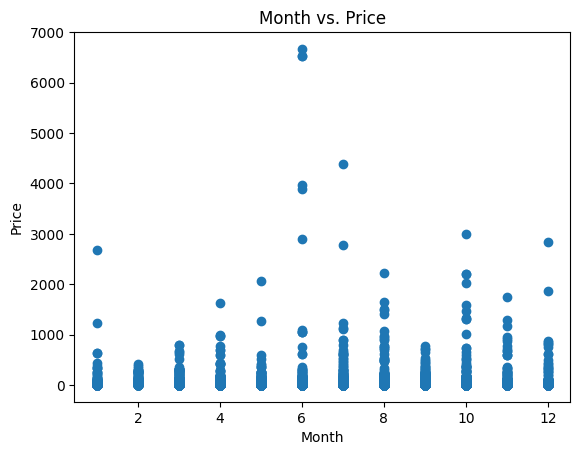

In [201]:
plt.scatter(df['month'], df['price'])
plt.title("Month vs. Price")
plt.xlabel("Month")
plt.ylabel("Price")
plt.show()

#### Conclusion
We can see no linear relationships between the features and the target, it suggests that methods relying on linear assumptions might not perform well

Potentially useful methods could be:
- Decision Trees and Ensembles
- SVM
- MLP

Potentially not useful methods:
- Linear regression

Preliminary list of features which may contribute to the performance of the ML model:
- categoryName/categoryId (each category has exemplary price window)
- storeName/storeId (each store may work for different categories)
- sold (there are weak inverse correlation between number of solded items and price)
- year (there are weak correlation between year and price)
- title (keywords that will make narrow view of the product)

## Data quality verification

In [202]:
df.isnull().sum()

storeId            0
storeName          0
title              0
rating             0
postCategory       0
sold               0
price              0
discount           0
shippingCost     652
category_name      0
category_id        0
type               0
year               0
month              0
day                0
dtype: int64

In [203]:
# Let's impute the nan values in shippingCost with the mean value
mean_shipping_cost = df['shippingCost'].mean()
df.fillna({'shippingCost': mean_shipping_cost}, inplace=True)

In [204]:
# check the missing values again
df.isnull().sum()

storeId          0
storeName        0
title            0
rating           0
postCategory     0
sold             0
price            0
discount         0
shippingCost     0
category_name    0
category_id      0
type             0
year             0
month            0
day              0
dtype: int64

## Preliminary data transformation

In [205]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
X = X[['title', 'rating', 'sold', 'discount', 'shippingCost', 'year', 'month', 'category_name', 'type']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [206]:
df.head()
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Column names
numerical_features = ['rating', 'sold', 'discount', 'shippingCost']
categorical_features = ['category_name', 'type', 'year', 'month']

# Define the transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Apply one-hot encoding
])

# Combine the transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        # ('text', text_transformer, text_features)
    ]
)

# Create the pipeline with the preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# transforming the data
X_train_transformed = pipeline.fit_transform(X_train).toarray()
X_test_transformed = pipeline.transform(X_test).toarray()

## POC

In [207]:
import torch
from torch.utils.data import DataLoader, TensorDataset, Dataset
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

In [208]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [209]:
from transformers import RobertaTokenizer, RobertaModel
from tqdm import tqdm

class TextDataset(Dataset):
    def __init__(self, text_series):
        self.text_series = text_series

    def __len__(self):
        return len(self.text_series)

    def __getitem__(self, idx):
        return self.text_series.iloc[idx]

def collate_fn(batch):
    return tokenizer(batch, return_tensors='pt', padding=True, truncation=True, max_length=512)

def generate_embeddings(text_series, model, batch_size=512):
    # Create DataLoader
    dataset = TextDataset(text_series)
    dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=collate_fn)

    embeddings_list = []

    # Generate embeddings in batches
    with torch.no_grad():
        for batch in tqdm(dataloader):
            torch.cuda.empty_cache()
            
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask)
            embeddings = outputs.last_hidden_state.mean(dim=1).cpu()  # Take the mean of the last hidden states
            embeddings_list.append(embeddings)

    # Concatenate all batch embeddings
    embeddings = torch.cat(embeddings_list, dim=0)

    return embeddings

# Load pre-trained model
model_name = 'roberta-base'
model = RobertaModel.from_pretrained(model_name).to(device)
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model.eval()

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0-11): 12 x RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropou

In [210]:
embeddings_train = generate_embeddings(X_train['title'], model)
embeddings_test = generate_embeddings(X_test['title'], model)

100%|██████████| 3/3 [00:02<00:00,  1.10it/s]


In [211]:
embeddings_train.shape

torch.Size([5128, 768])

In [212]:
del model
torch.cuda.empty_cache()

In [213]:
train_batch_size = 32
test_batch_size = 32

X_train_transformed_tensor = torch.tensor(X_train_transformed, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_transformed_tensor = torch.tensor(X_test_transformed, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [214]:
X_train_tensor = torch.concat([X_train_transformed_tensor, embeddings_train], dim=1)
X_test_tensor = torch.concat([X_test_transformed_tensor, embeddings_test], dim=1)
X_train_tensor.shape

torch.Size([5128, 1061])

In [215]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


train_loader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False)

In [216]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Sequential(nn.Linear(input_size, 512), nn.ReLU())
        self.fc2 = nn.Sequential(nn.Linear(512, 64), nn.ReLU())
        self.fc3 = nn.Sequential(nn.Linear(64, 1))

    def forward(self, x):
        out = self.fc1(x)
        out = self.fc2(out)
        out = self.fc3(out)
        return out


# Define the training function
def train_model(model, criterion, optimizer, dataloader, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            labels = labels.view(-1, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(dataloader.dataset)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')
    return model



In [217]:
# Define the model, criterion, and optimizer
input_size = X_train_tensor.shape[1]

model = MLP(input_size).to(device)
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
model = train_model(model, criterion, optimizer, train_loader, num_epochs)


Epoch 1/100, Loss: 43195.1347
Epoch 2/100, Loss: 38314.6554
Epoch 3/100, Loss: 35317.2727
Epoch 4/100, Loss: 33380.3142
Epoch 5/100, Loss: 30814.8394
Epoch 6/100, Loss: 29277.6155
Epoch 7/100, Loss: 27649.2912
Epoch 8/100, Loss: 26562.2440
Epoch 9/100, Loss: 25758.2855
Epoch 10/100, Loss: 24864.9742
Epoch 11/100, Loss: 23475.1395
Epoch 12/100, Loss: 23075.4437
Epoch 13/100, Loss: 22218.6723
Epoch 14/100, Loss: 21517.2400
Epoch 15/100, Loss: 20679.7461
Epoch 16/100, Loss: 19624.8079
Epoch 17/100, Loss: 19104.9772
Epoch 18/100, Loss: 18711.7902
Epoch 19/100, Loss: 17954.9979
Epoch 20/100, Loss: 17577.5166
Epoch 21/100, Loss: 16512.0669
Epoch 22/100, Loss: 15554.4696
Epoch 23/100, Loss: 14551.1991
Epoch 24/100, Loss: 14618.5064
Epoch 25/100, Loss: 14076.6183
Epoch 26/100, Loss: 13320.6696
Epoch 27/100, Loss: 12329.3659
Epoch 28/100, Loss: 12150.4405
Epoch 29/100, Loss: 11333.7992
Epoch 30/100, Loss: 10862.3795
Epoch 31/100, Loss: 10601.2680
Epoch 32/100, Loss: 9643.9992
Epoch 33/100, Loss

In [218]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(model, dataloader):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            y_true.extend(labels.cpu().numpy())  # Convert labels to numpy array
            y_pred.extend(outputs.cpu().numpy())  # Convert predictions to numpy array

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    r2 = r2_score(y_true, y_pred)
    print(f'R^2 Score: {r2:.4f}')
    print(f'MSE Score: {mean_squared_error(y_true, y_pred):.4f}')
    print(f'MAE Score: {mean_absolute_error(y_true, y_pred):.4f}')

In [219]:
evaluate_model(model, test_loader)


R^2 Score: 0.8418
MSE Score: 12932.9346
MAE Score: 27.3947


In [220]:
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        labels = labels.view(-1, 1)
        for i in range(len(labels)):
            print(labels[i].item(), outputs[i].item())
        break

12.670000076293945 20.064044952392578
14.359999656677246 10.781058311462402
2.509999990463257 11.829219818115234
3.9800000190734863 3.137532949447632
791.0399780273438 700.2731323242188
9.109999656677246 8.575584411621094
12.319999694824219 23.139690399169922
10.890000343322754 14.577436447143555
3.049999952316284 2.4325203895568848
21.700000762939453 29.144861221313477
3.740000009536743 4.992971420288086
24.520000457763672 17.371253967285156
9.489999771118164 11.595423698425293
6.679999828338623 2.48875093460083
126.83999633789062 128.54818725585938
15.069999694824219 10.830778121948242
12.050000190734863 31.623340606689453
1.3899999856948853 2.0860373973846436
12.010000228881836 16.45092010498047
141.67999267578125 261.62353515625
30.309999465942383 37.77649688720703
117.7699966430664 91.1744384765625
31.700000762939453 22.688186645507812
10.619999885559082 11.831642150878906
3.240000009536743 5.169844627380371
12.319999694824219 14.114389419555664
33.04999923706055 32.6060791015625
